In [2]:
# Library imports
import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None  # default='warn'

# Get datasets from preprocessing
training = preprocessing.get_training_set()
test = preprocessing.get_test_set()
hh_char = preprocessing.INECDataSet('household_characteristics').get_dataset()
education = preprocessing.INECDataSet('edu').get_dataset()
edu_level = preprocessing.INECDataSet('edu_lvl').get_dataset()

# Verify successful load of datasets
assert not training.empty
assert not test.empty
assert not hh_char.empty
assert not education.empty
assert not edu_level.empty



Start to load data...


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [25]:
# Matplotlib setting
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [49]:
grp = training.groupby('Target')
g1 = grp.get_group(1)
g2 = grp.get_group(2)
g3 = grp.get_group(3)
g4 = grp.get_group(4)

dict_keys([1, 2, 3, 4])

In [3]:
avg_child = [ig['hogar_nin'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
avg_adult = [ig['hogar_adul'].sum()/ig.shape[0] for ig in [g1,g2,g3,g4]]
children = go.Bar(
    x=[1, 2, 3, 4],
    y=avg_child,
    name='Children'
)
adult = go.Bar(
    x=[1, 2, 3, 4],
    y=avg_adult,
    name='Adults'
)

layout = go.Layout(
    xaxis={'title': 'Income Group'},
    yaxis={'title': 'Average number per household'},
    barmode='stack'
)

fig = go.Figure(data=[children,adult], layout=layout)#, layout=layout)
py.iplot(fig)

In [4]:
t1 = go.Pie(labels=[1,2,3,4], values=[1.8, 34.23, 52.25, 11.71], hole=0.8)
t2 = go.Pie(labels=[1,2,3,4], values=[0.68, 38.69, 50.68, 9.95], hole=0.8, domain={'x': [0.11, 0.89], 'y': [0.11,0.89]})
t3 = go.Pie(labels=[1,2,3,4], values=[0.85, 44.51, 48.17, 6.48], hole=0.8, domain={'x': [0.2, 0.8], 'y': [0.2,0.8]})
t4 = go.Pie(labels=[1,2,3,4], values=[0.26, 56.04, 41.40, 2.30], domain={'x': [0.3, 0.7], 'y': [0.3,0.7]})

# layout = go.Layout(
#     xaxis={'title': 'Income Group'},
#     yaxis={'title': 'Average number per household'},
#     barmode='stack'
# )


fig = go.Figure(data=[t1, t2, t3, t4])#, layout=layout)
py.iplot(fig)

In [43]:
# def region_line_plot(df, col):
#     """
#     Creates plotly line plots comparing regions
#     :param df: DataFrame storing the data
#     :type df: Pandas DataFrame
#     :param col: Name of the column to plot
#     :type col: String
#     """
#     region = ['Central', ]

# Average Income per household percent change

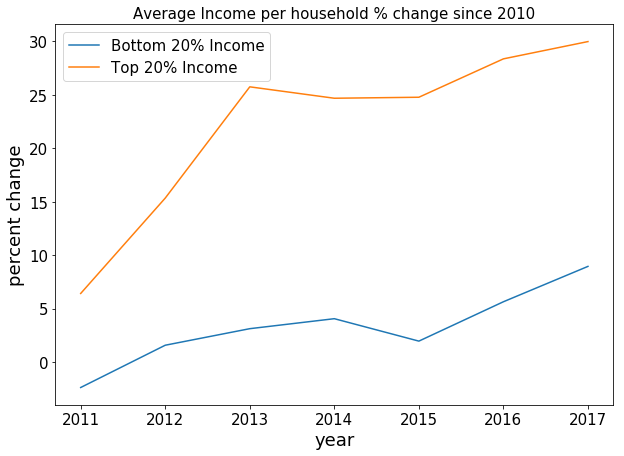

In [72]:
def get_region(df, region_col_name, regions_to_get):
    """
    Given a pandas DataFrame, get the <regions_to_get> from <region_col_name>. Return the result as a DataFrame
    :param df: Pandas DataFrame to work on
    :type df: Pandas DataFrame
    :param region_col_name: Name of the column to get region from
    :type region_col_name: str
    :param regions_to_get: List of regions to get from df
    :type regions_to_get: List of str
    """
    assert isinstance(df, pd.core.frame.DataFrame)
    assert not df.empty
    assert isinstance(region_col_name, str)
    assert region_col_name in df.columns, f'{region_col_name} not in dataframe columns'
    region_grp = df.groupby(region_col_name)
    assert [region in region_grp.groups.keys() for region in regions_to_get], '{regions_to_get} not found in column {region_col_name}!'
    
    region_df = pd.concat([region_grp.get_group(region_name) for region_name in regions_to_get])
    assert not region_df.empty
    return region_df

average_income_household = get_region(hh_char, 'Category', ['Income per household', 'Average income per household',
                                                           'Average total household income'])
# average_income_household_person = get_region(hh_char, 'Category', ['Per capita income per household',
#                                                                   'Average household income per capita'])
average_income_household.loc[:,['Total', 'Quintil 1', 'Quintil 2', 'Quintil 3', 'Quintil 4', 'Quintil 5']] = average_income_household.loc[:,['Total', 'Quintil 1', 'Quintil 2', 'Quintil 3', 'Quintil 4', 'Quintil 5']].astype(float)
# average_income_household_person.loc[:,['Total', 'Quintil 1', 'Quintil 2', 'Quintil 3', 'Quintil 4', 'Quintil 5']] = average_income_household_person.loc[:,['Total', 'Quintil 1', 'Quintil 2', 'Quintil 3', 'Quintil 4', 'Quintil 5']].astype(float)

cr_avg_income_pct_change = get_region(average_income_household, 'region', ['Whole Costa Rica']).set_index('year').drop(['Category','region'],axis=1)
for year in range(2011,2018):
    cr_avg_income_pct_change.loc[year,:] = (cr_avg_income_pct_change.loc[year,:] / cr_avg_income_pct_change.loc[2010,:] - 1) * 100

cr_avg_income_pct_change = cr_avg_income_pct_change.drop(2010)
fig, ax = plt.subplots(figsize=(10,7))
cr_avg_income_pct_change['Quintil 1'].plot.line(ax=ax)
cr_avg_income_pct_change['Quintil 5'].plot.line(ax=ax)
ax.set_title('Average Income per household % change since 2010')
ax.legend(labels=['Bottom 20% Income', 'Top 20% Income'])
ax.set_ylabel('percent change');
    
    

# Overcrowding: Number of person per room

Text(0.5,1,'Person per Room for Households in Four Poverty Levels')

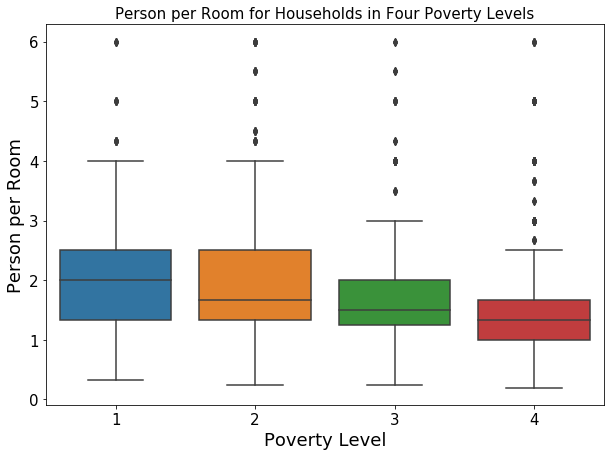

In [47]:
fig, ax = plt.subplots(figsize=[10,7])
sns.boxplot(x='Target', y='overcrowding', data=training, ax=ax)
ax.set_ylabel('Person per Room')
ax.set_xlabel('Poverty Level')
ax.set_title('Person per Room for Households in Four Poverty Levels')

In [7]:
year = list(range(2010,2018))
pov = [21.2, 21.7, 20.6, 20.7, 22.4, 21.7, 20.5, 20.0]
poverty_old = go.Scatter(
    x = year[:5],
    y = pov[:5],
    mode = 'lines+markers',
    name = '% Poverty',
)
poverty_new = go.Scatter(
    x = year[4:],
    y = pov[4:],
    mode = 'lines+markers',
    name = '% Poverty'
)
layout = go.Layout(
    color='red'
)

fig = go.Figure(data=[poverty_old, poverty_new], layout=layout)
py.iplot(fig)

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'color'

    Valid properties:
        angularaxis
            plotly.graph_objs.layout.AngularAxis instance or dict
            with compatible properties
        annotations
            plotly.graph_objs.layout.Annotation instance or dict
            with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        colorway
            Sets the default trace colors.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        direction
            Legacy polar charts are deprecated! Please switch to
            "polar" subplots. Sets the direction corresponding to
            positive angles in legacy polar charts.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        geo
            plotly.graph_objs.layout.Geo instance or dict with
            compatible properties
        grid
            plotly.graph_objs.layout.Grid instance or dict with
            compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels

        hiddenlabelssrc
            Sets the source reference on plot.ly for  hiddenlabels
            .
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the plotly
            service (at https://plot.ly or on-premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            plotly.graph_objs.layout.Hoverlabel instance or dict
            with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            `clickmode` includes the "select" flag, `hovermode`
            defaults to "closest". If `clickmode` lacks the
            "select" flag, it defaults to "x" or "y" (depending on
            the trace's `orientation` value) for plots based on
            cartesian coordinates. For anything else the default
            value is "closest".
        images
            plotly.graph_objs.layout.Image instance or dict with
            compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            plotly.graph_objs.layout.Legend instance or dict with
            compatible properties
        mapbox
            plotly.graph_objs.layout.Mapbox instance or dict with
            compatible properties
        margin
            plotly.graph_objs.layout.Margin instance or dict with
            compatible properties
        modebar
            plotly.graph_objs.layout.Modebar instance or dict with
            compatible properties
        orientation
            Legacy polar charts are deprecated! Please switch to
            "polar" subplots. Rotates the entire polar by the given
            angle in legacy polar charts.
        paper_bgcolor
            Sets the color of paper where the graph is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the color of plotting area in-between x and y
            axes.
        polar
            plotly.graph_objs.layout.Polar instance or dict with
            compatible properties
        radialaxis
            plotly.graph_objs.layout.RadialAxis instance or dict
            with compatible properties
        scene
            plotly.graph_objs.layout.Scene instance or dict with
            compatible properties
        selectdirection
            When "dragmode" is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            plotly.graph_objs.layout.Shape instance or dict with
            compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            plotly.graph_objs.layout.Slider instance or dict with
            compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            plotly.graph_objs.layout.Ternary instance or dict with
            compatible properties
        title
            Sets the plot's title.
        titlefont
            Sets the title font.
        updatemenus
            plotly.graph_objs.layout.Updatemenu instance or dict
            with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins.
        width
            Sets the plot's width (in px).
        xaxis
            plotly.graph_objs.layout.XAxis instance or dict with
            compatible properties
        yaxis
            plotly.graph_objs.layout.YAxis instance or dict with
            compatible properties
        